In [3]:
import cv2
from pathlib import Path
import numpy as np
import os
from glob import glob
import natsort
import matplotlib.pyplot as plt

In [4]:
def extract_hair(img):
    img_grayscale = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    

    return img

In [5]:
ROOT_PATH = Path(Path(os.getcwd())/"../challenge1")
TRAIN_PATH = ROOT_PATH/"train"
VAL_PATH = ROOT_PATH/"val"

train_nevus = sorted(glob(str(TRAIN_PATH/'nevus/*')))
train_others = sorted(glob(str(TRAIN_PATH/'others/*')))

print(TRAIN_PATH)

c:\master\udg\CAD\project\notebooks\..\challenge1\train


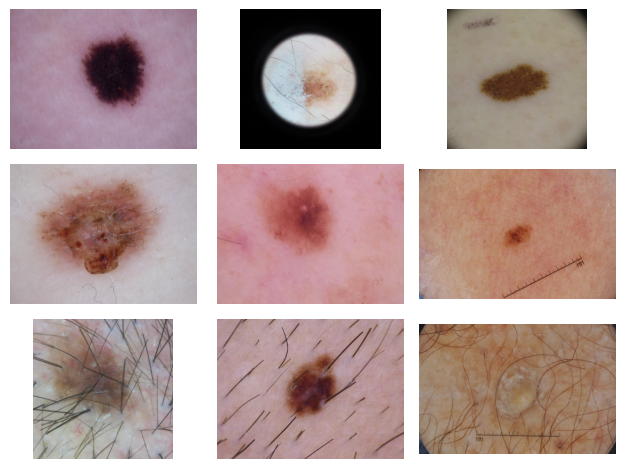

In [14]:
#plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = cv2.imread(train_nevus[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()

(-0.5, 1023.5, 1023.5, -0.5)

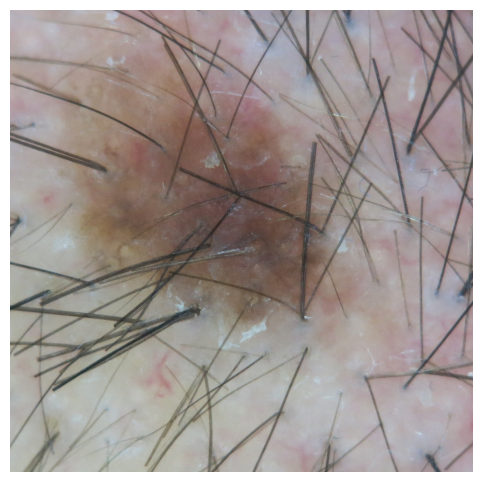

In [8]:
plt.figure(figsize=(12, 6))
img = cv2.imread(train_nevus[6])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

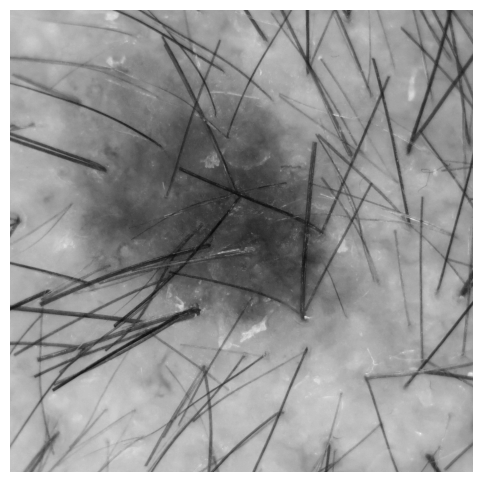

In [9]:
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))
plt.imshow(img_grayscale, cmap='gray')
plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

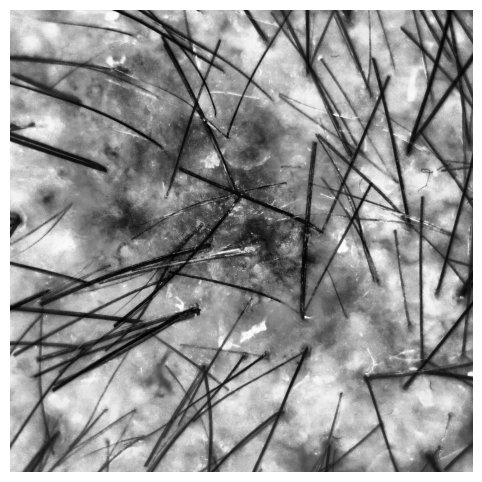

In [31]:
clip_limit = 5.0 # 10.0
tile_size = 6 # 6

CLAHE = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_size,tile_size))
img_CLAHE = CLAHE.apply(img_grayscale)

plt.figure(figsize=(12, 6))
plt.imshow(img_CLAHE, cmap='gray')
plt.axis('off')

In [12]:
# Mean filter
kernel_size = 5
blurred_image = cv2.blur(img_CLAHE, (kernel_size,kernel_size))



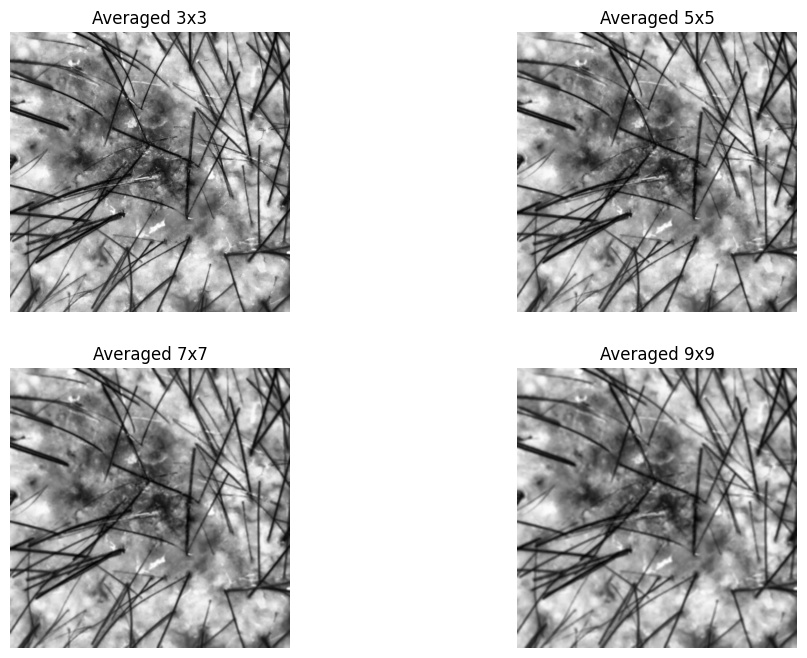

In [32]:
# Define kernel sizes for the average filters
kernel_sizes = [3, 5, 7, 9]


# Create an empty list to store the averaged images
averaged_images = []

# Apply average filters with different kernel sizes
for kernel_size in kernel_sizes:
    # Apply the average filter
    averaged_image = cv2.blur(img_CLAHE, (kernel_size, kernel_size))
    
    # Append the averaged image to the list
    averaged_images.append(averaged_image)


# Display the averaged images for different kernel sizes
plt.figure(figsize=(12, 8))
plt.tight_layout()
for i, kernel_size in enumerate(kernel_sizes):
    plt.subplot(2, 2, i+1)
    plt.imshow(averaged_images[i], cmap='gray')
    plt.title(f'Averaged {kernel_size}x{kernel_size}')
    plt.axis('off')
    

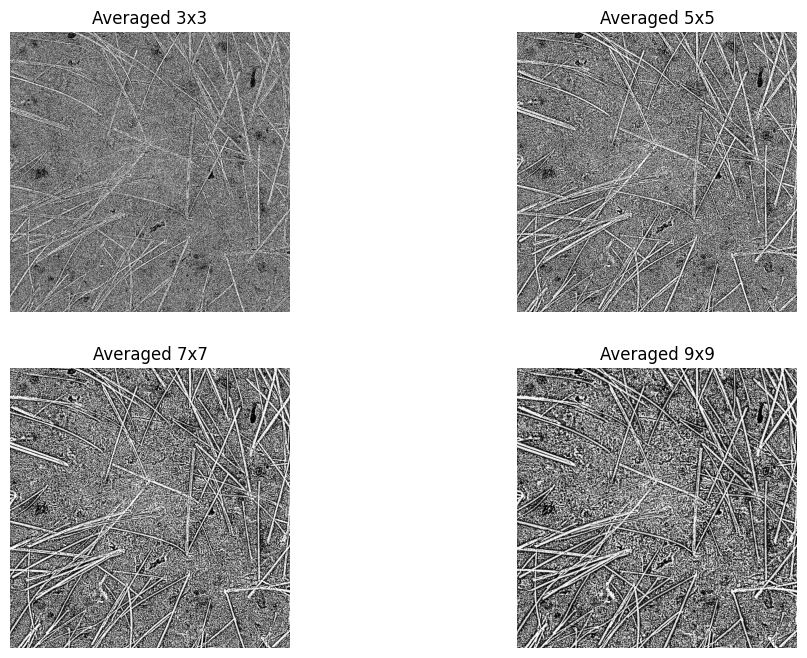

In [33]:
hair_masks = []
for i in range(len(kernel_sizes)):
    #hair_masks.append(averaged_images[i] - img_CLAHE)
    hair_masks.append(img_CLAHE - averaged_images[i])

plt.figure(figsize=(12, 8))
plt.tight_layout()
for i, kernel_size in enumerate(kernel_sizes):
    plt.subplot(2, 2, i+1)
    plt.imshow(hair_masks[i], cmap='gray')
    plt.title(f'Averaged {kernel_size}x{kernel_size}')
    plt.axis('off')

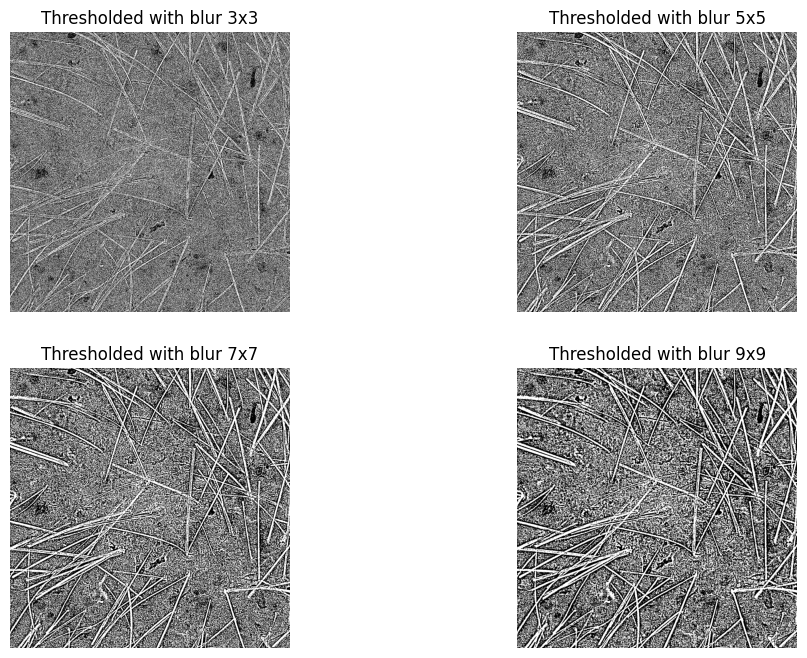

In [41]:
thresholded_imgs = []

for i in range(len(kernel_sizes)):
    _ , thr_img = cv2.threshold(hair_masks[i], 0 ,255, cv2.THRESH_OTSU)
    thresholded_imgs.append(thr_img)

plt.figure(figsize=(12, 8))
plt.tight_layout()
for i, kernel_size in enumerate(kernel_sizes):
    plt.subplot(2, 2, i+1)
    plt.imshow(thresholded_imgs[i], cmap='gray')
    plt.title(f'Thresholded with blur {kernel_size}x{kernel_size}')
    plt.axis('off')

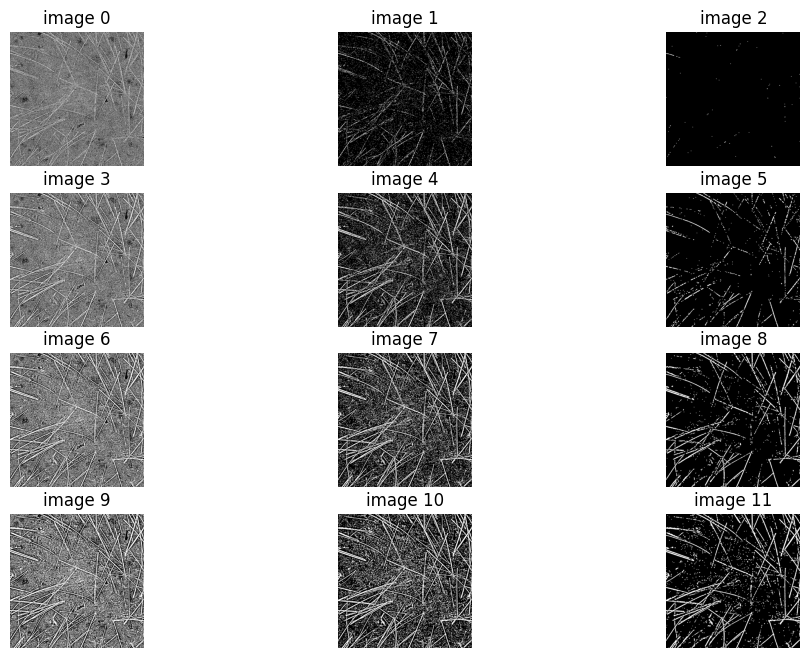

In [43]:
p_values = [1, 3, 5] #[10, 30, 50]
opening_images = []

for i in range(len(thresholded_imgs)):
    for j, p in enumerate(p_values):
        structElemOpening = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (p, p))
        img_opening = cv2.morphologyEx(thresholded_imgs[i], cv2.MORPH_OPEN, structElemOpening)
        opening_images.append(img_opening)


plt.figure(figsize=(12, 8))
plt.tight_layout()
for i in range(len(opening_images)):
    plt.subplot(4, 3, i+1)
    plt.imshow(opening_images[i], cmap='gray')
    plt.title(f'image {i}')
    plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

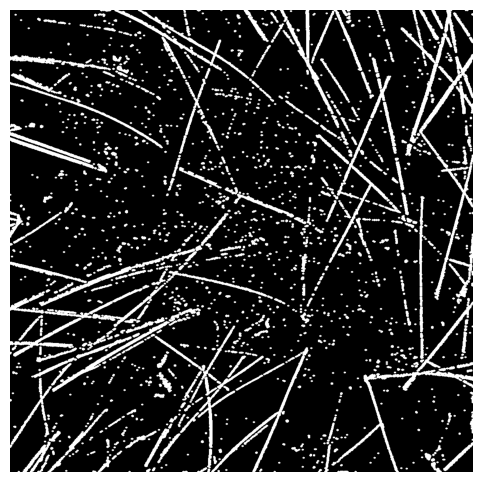

In [44]:
plt.figure(figsize=(12, 6))
plt.imshow(opening_images[11], cmap='gray')
plt.axis('off')